#  I- Régression Linéaire Multiple

On parle de Régression Linéaire Multiple lorsqu'on integre plusieures variables $x_1,x_2,....x_n$
 à notre modèle et que les choses commencent à devenir vraiment intéressantes. 
Le but de la Régression Linéaire Multiple est de rouver le meilleur ensemble  $\theta=(\theta_0,\theta_1,...., \theta_n)$ revient à  minimiser le coût global des erreurs unitaires qui se définit comme suit :
		$$  \min J(\theta)=\min_{\theta}\frac{1}{2m}\sum_{i=0}^{m} (h_\theta(x(i))-y(i))^2$$
avec $m$ est la taille du training set.
Avec $$h_\theta(x)=\theta_0+\theta_1 x_1+\theta_2x_2+.....+\theta_n x_n $$  


# 1-datasets

###   Créer un modèle à deux variables de régression linéaire multiple (n=2), 
 (x,y) avec $m$ exemples, $2$ variables 
		
$
			X=\begin{pmatrix} 
			x_1^{(1)}&	x_2^{(1)}&1\\                
			x_1^{(2)}&x_2^{(2)}&1\\ 
			..&..&..1\\ 
			..&..&..1\\ 
			x_1^{(m)}&x_2^{(m)}&1
			\end{pmatrix}\notag
			$
            
$       Y= \begin{pmatrix}
		Y^{(1)}\\ 
		Y^{(2)}\\
		.....\\
		.....\\
		Y^{(m)}
        \end{pmatrix}
        $
            
$           \theta=\begin{pmatrix} 
			\theta_1\\ 
			\theta_2\\ 
			\theta_0
			\end{pmatrix}
            $
	
  

#### 1-Générer de données aléatoires
#### 2-Afficher les données en 2D puis en 3D


100

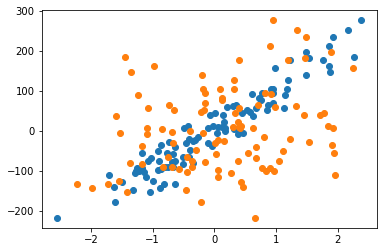

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
np.random.seed(0)
x,y=make_regression(n_samples=100,n_features=2,noise=10)
plt.scatter(x[:,1],y)
plt.scatter(x[:,0],y)
len(x)

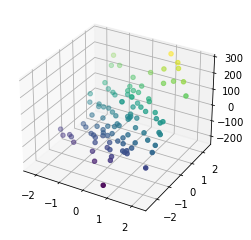

In [2]:
#plt.figure(figsize=(12,6))
ax = plt.axes(projection='3d')
ax.scatter(x[:,0], x[:, 1],y,c=y)
plt.show()

#### 3-redimentioner les matrices, créer la matrice X et $\theta$

In [3]:
y=y.reshape((y.shape[0],1))
y.shape
X=np.hstack((x,np.ones(y.shape)))
X
O=np.random.randn(3,1)
X.shape
y.shape

(100, 1)

#### 4-Implémenter le model de prédiction, Fonction cout, Gradients et Descente de Gradient

In [4]:
def mod_pred(X,O):
    H=X.dot(O)
    return H

In [5]:
def cost(X,O,y):
    H=1/(2*len(y)) * np.sum((mod_pred(X,O)-y)**2)
    return H

In [6]:
cost(X,O,y)

5294.071342926028

In [7]:
def gradient(X,O,y):
    H=1/len(y) * X.T.dot((mod_pred(X,O)-y))
    return H

In [8]:
gradient(X,O,y)

array([[ -28.57889511],
       [-100.06029486],
       [  -3.80096722]])

In [9]:
def de_gr(alpha,O,y,X,n_iter):
    cost_h=np.zeros(n_iter)
    for i in range(0,n_iter):
         O=O- alpha*gradient(X,O,y)
         cost_h[i]=cost(X,O,y)
    return O,cost_h

In [10]:
O_final,c=de_gr(0.01,O,y,X,1000)
O_final

array([[28.67154616],
       [97.29524926],
       [-0.511481  ]])

In [11]:
prediction=mod_pred(X,O_final)

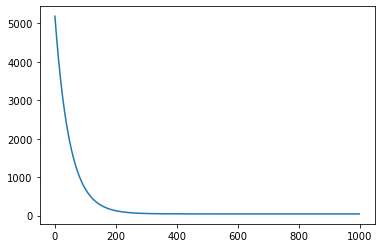

In [12]:
plt.plot(range(1000),c)

 #### 5-Afficher les valeurs de $\theta$


In [13]:
de_gr(0.01,O,y,X,1000)
O

array([[-0.82646112],
       [ 0.78420863],
       [-0.1954172 ]])

### 6-Afficher les résultats de prédictions par rapport a notre Dataset ainsi que la courbe d'apprentissage

Text(0.5, 1.0, 'x [1]')

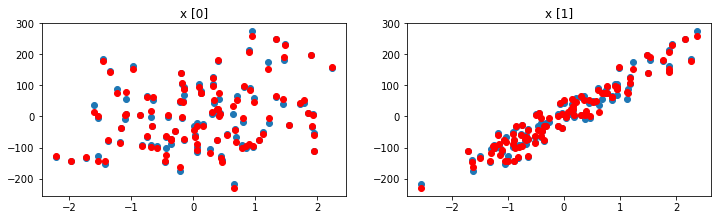

In [14]:

plt.figure(figsize=(12,7))
plt.subplot(2,2,1)
plt.scatter(x[:,0],y)
plt.scatter(x[:,0], prediction, c='r')
plt.title('x [0]')

plt.subplot(2,2,2)
plt.scatter(x[:,1],y)
plt.scatter(x[:,1], prediction, c='r')
plt.title('x [1]')

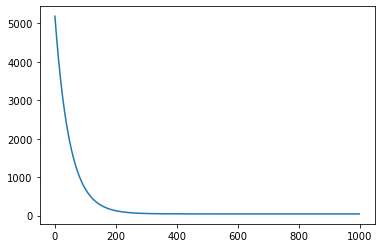

In [15]:
plt.plot(range(1000),c)

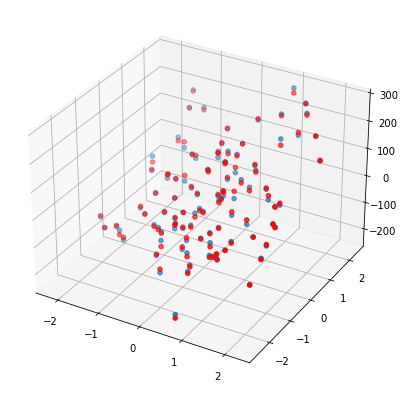

In [16]:
plt.figure(figsize=(12,7))
ax = plt.axes(projection='3d')
ax.scatter(x[:, 0], x[:, 1],y)
ax.scatter(x[:, 0], x[:, 1], prediction, c='r')
plt.show()

### 7-Utiliser le coefficient de détermination pour évaluer la réelle performance et interpréter le resultats

In [17]:
def determination_coef(Y,predictions):
    cost = np.sum((Y - predictions)**2)
    cost_y = np.sum((Y - np.mean(Y))**2)
    return 1 - cost/cost_y

In [18]:
determination_coef(y,prediction)

0.9916687122277607

#  II- Régression Polynomiale

Pour développer un modèle polynomial à partir des équations de la régression linéaire, il suffit d'ajouter des degrés de polynome dans les colonnes de la matrice. On développera un modèle qui vise à chercher la fonction de prédiction $$h_\theta(x)=\theta_0+\theta_1 x+\theta_2x^2+.....+\theta_n x^n $$  

# 1-datasets
	Pour n=2, on a 
$
			X=\begin{pmatrix} 
			x^{(1)}&	x^{2^{(1)}}&1\\                
			x^{(2)}&x^{2^{(2)}}&1\\ 
			..&..&..1\\ 
			..&..&..1\\ 
			x^{(m)}&x^{2^{(m)}}&1
			\end{pmatrix}\notag
			$
            
$       Y= \begin{pmatrix}
		Y^{(1)}\\ 
		Y^{(2)}\\
		.....\\
		.....\\
		Y^{(m)}
        \end{pmatrix}
        $
            
$           \theta=\begin{pmatrix} 
			\theta_1\\ 
			\theta_2\\ 
			\theta_0
			\end{pmatrix}
            $
	

 ### Refaire les mêmes étapes pour créer un model de prédiction par la régression polynomiale
  NB:modifier les valeurs de y pour rendre le dataset non-linéaire ( utiliser une fonction non linéaire)

In [19]:
from sklearn.datasets import make_regression
x,y=make_regression(n_samples=100,n_features=1,noise=10)

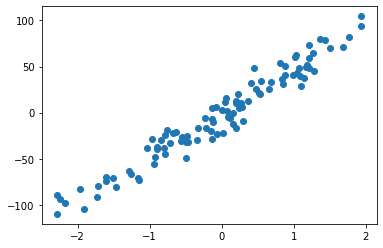

In [20]:
plt.scatter(x,y)

In [21]:
y=y+abs(y/2)

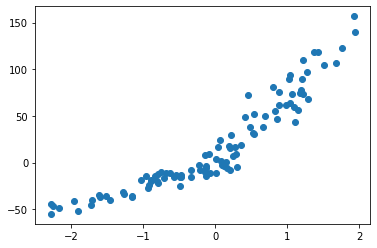

In [22]:
plt.scatter(x,y)

In [23]:
x
X=np.hstack((x,np.ones(x.shape)))
X

array([[-0.78880951,  1.        ],
       [ 0.51910492,  1.        ],
       [-0.47083963,  1.        ],
       [ 0.00796627,  1.        ],
       [-1.46186553,  1.        ],
       [ 1.09958891,  1.        ],
       [ 0.16198952,  1.        ],
       [ 1.36425174,  1.        ],
       [ 0.53995243,  1.        ],
       [ 0.19420664,  1.        ],
       [-0.55147413,  1.        ],
       [-0.23118671,  1.        ],
       [-1.71697153,  1.        ],
       [-0.89853941,  1.        ],
       [-0.80299474,  1.        ],
       [-1.15179807,  1.        ],
       [-0.9674974 ,  1.        ],
       [ 0.09173765,  1.        ],
       [-0.68024363,  1.        ],
       [ 1.04362959,  1.        ],
       [ 1.0223032 ,  1.        ],
       [ 1.4306019 ,  1.        ],
       [ 1.21308761,  1.        ],
       [-2.25126119,  1.        ],
       [-0.7609473 ,  1.        ],
       [ 0.29965873,  1.        ],
       [ 0.88193495,  1.        ],
       [ 0.83058861,  1.        ],
       [-0.14580725,

In [24]:
X=np.hstack((x**2,X))
X

array([[ 6.22220440e-01, -7.88809508e-01,  1.00000000e+00],
       [ 2.69469917e-01,  5.19104919e-01,  1.00000000e+00],
       [ 2.21689953e-01, -4.70839626e-01,  1.00000000e+00],
       [ 6.34615159e-05,  7.96627365e-03,  1.00000000e+00],
       [ 2.13705083e+00, -1.46186553e+00,  1.00000000e+00],
       [ 1.20909576e+00,  1.09958891e+00,  1.00000000e+00],
       [ 2.62406030e-02,  1.61989515e-01,  1.00000000e+00],
       [ 1.86118280e+00,  1.36425174e+00,  1.00000000e+00],
       [ 2.91548629e-01,  5.39952432e-01,  1.00000000e+00],
       [ 3.77162206e-02,  1.94206644e-01,  1.00000000e+00],
       [ 3.04123711e-01, -5.51474125e-01,  1.00000000e+00],
       [ 5.34472947e-02, -2.31186710e-01,  1.00000000e+00],
       [ 2.94799125e+00, -1.71697153e+00,  1.00000000e+00],
       [ 8.07373076e-01, -8.98539413e-01,  1.00000000e+00],
       [ 6.44800556e-01, -8.02994742e-01,  1.00000000e+00],
       [ 1.32663879e+00, -1.15179807e+00,  1.00000000e+00],
       [ 9.36051216e-01, -9.67497398e-01

In [25]:
y=y.reshape((len(y),1))

In [26]:
O=np.random.randn(3,1)
O

array([[ 0.1965574 ],
       [-0.1427024 ],
       [-0.09095598]])

In [27]:
def mod_pred(X,O):
    H=X.dot(O)
    return H

In [28]:
def cost(X,O,y):
    H=1/(2*len(y)) * np.sum((mod_pred(X,O)-y)**2)
    return H

In [29]:
cost(X,O,y)

1386.5505879657921

In [30]:
def gradient(X,O,y):
    H=1/len(y) * X.T.dot((mod_pred(X,O)-y))
    return H

In [31]:
gradient(X,O,y)

array([[-19.18032268],
       [-46.88848896],
       [-17.35650358]])

In [34]:
def de_gr(alpha,O,y,X,n_iter):
    cost_h=np.zeros(n_iter)
    for i in range(0,n_iter):
         O=O- alpha*gradient(X,O,y)
         cost_h[i]=cost(X,O,y)
    return O,cost_h

In [35]:
O_final,c=de_gr(0.01,O,y,X,1000)
O_final

array([[11.69112113],
       [48.44111166],
       [ 6.9023983 ]])

In [36]:
prediction=mod_pred(X,O_final)

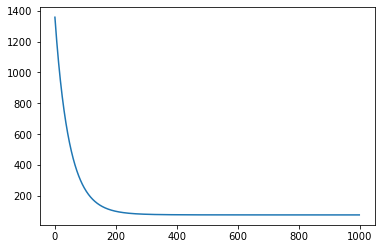

In [37]:
plt.plot(range(1000),c)

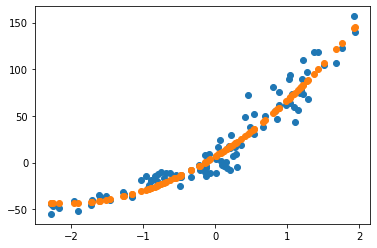

In [38]:
plt.scatter(X[:,1],y)
plt.scatter(x,prediction)


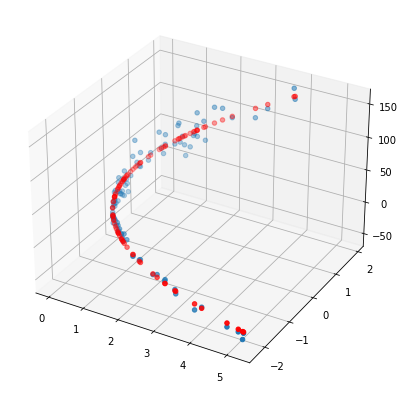

In [39]:
plt.figure(figsize=(12,7))
ax = plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:, 1],y)
ax.scatter(X[:, 0], X[:, 1], prediction, c='r')
plt.show()

In [113]:
def determination_coef(Y,predictions):
    cost = np.sum((Y - predictions)**2)
    cost_y = np.sum((Y - np.mean(Y))**2)
    return 1 - cost/cost_y

In [114]:
determination_coef(y,prediction)

0.9286937867581694

# III- Régressions linéaires avec Statsmodels et Scikit-Learn
 En utilisant les données du fichiers "mtcars.csv", on vise à prédire la consommation d'essence du véhicule "mpg" en fonction du poids du véhicule "wt" et la puissance du vehicule "hp" (horse power) en appliquant la régression linéaire multiple et polynomiale.

## 1-Regression  multiple en utilisant Scikit-Learn 
    1-importer les données 
    2-faites appel à "linear_model.LinearRegression" de Scikit-Learn 
    3-Vous faites la prédiction
    4-Afficher en 3d les résultats 
    5-Quel est la consommation d'essence du véhicule prédite avec le poids de 3.1 et une puissance de 120

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

In [41]:
data=pd.read_csv("mtcars.csv")
data.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [43]:
y=data[['mpg']]
x=data[['hp','wt']]
y

,mpg
0,21.0
1,21.0
2,22.8
3,21.4
4,18.7
5,18.1
6,14.3
7,24.4
8,22.8
9,19.2


In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [45]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [47]:
prediction=(model.predict(x_test))
print(model.predict(x_test))
print(y_test)

[[20.37695767]
 [ 9.04558634]
 [16.34319675]
 [26.25632096]
 [21.69641461]
 [19.64736666]
 [11.88440004]]
     mpg
29  19.7
15  10.4
24  19.2
17  32.4
8   22.8
9   19.2
30  15.0


In [48]:
model.predict([[3.1,120]])

array([[-413.61030308]])

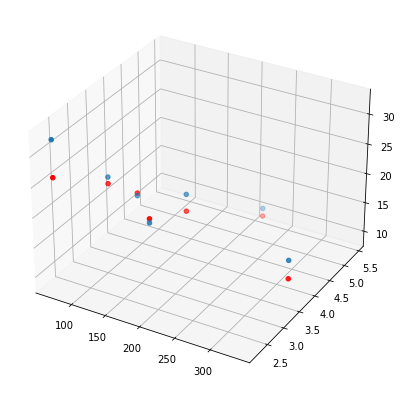

In [61]:
plt.figure(figsize=(12,7))
ax = plt.axes(projection='3d')
ax.scatter(x_test['hp'], x_test['wt'],y_test)
ax.scatter(x_test['hp'], x_test['wt'],prediction, c='r')
plt.show()


## 2-Regression  multiple en utilisant statsmodels
    refaire les memes etatpes, comparer les résultas

In [174]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [175]:
import statsmodels.api as sm
X = sm.add_constant(x_train) 
model = sm.OLS(y_train, x_train).fit()
y_pred = model.predict(x_test) 

# afficher le figure


In [176]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.727
Model:                            OLS   Adj. R-squared (uncentered):              0.703
Method:                 Least Squares   F-statistic:                              30.65
Date:                Sun, 06 Mar 2022   Prob (F-statistic):                    3.26e-07
Time:                        01:13:10   Log-Likelihood:                         -95.338
No. Observations:                  25   AIC:                                      194.7
Df Residuals:                      23   BIC:                                      197.1
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
hp            -0.0425      0.054     -0.785      0.440      -0.155       0.069
wt             7.3273      2.524      2.903      0.008       2.106      12.549
==============================================================================
Omnibus:                        0.478   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.254
Skew:                           0.238   Prob(JB):                        0.881
Kurtosis:                       2.870   Cond. No.                         169.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

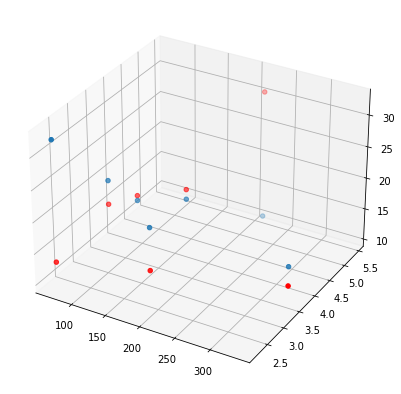

In [181]:
plt.figure(figsize=(12,7))
ax = plt.axes(projection='3d')
ax.scatter(x_test['hp'], x_test['wt'],y_test)
ax.scatter(x_test['hp'], x_test['wt'],y_pred, c='r')
plt.show()


In [162]:
y_test.shape


(7, 1)

In [168]:
x_test.shape

(7, 2)